In [8]:
import pandas as pd
import numpy as np 

In [17]:
df=pd.read_csv(r"D:\jupyter projects\Machine Learning\placement project\placement.csv")

df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [50]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection

In [20]:
df=df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


### 0. Preprocess + EDA + Feature Selection

In [21]:
import matplotlib.pyplot as plt

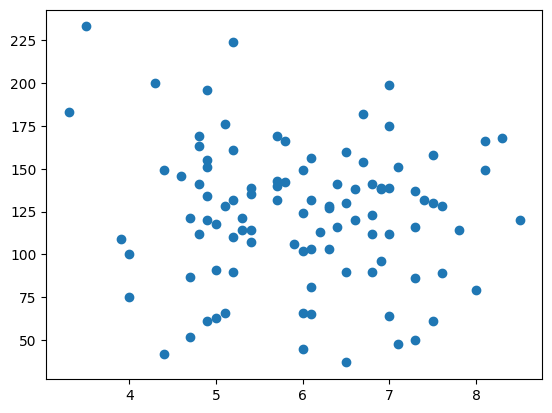

In [22]:
plt.scatter(df['cgpa'],df['iq'])

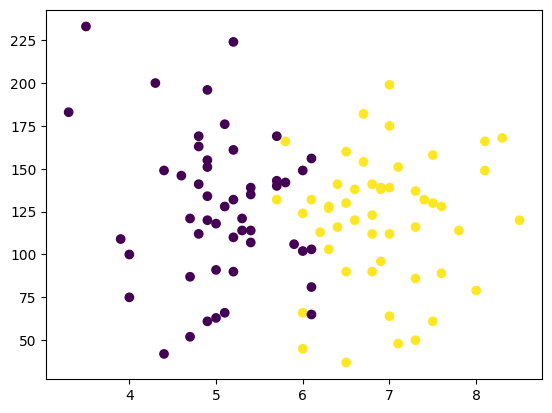

In [23]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

### 1. Extract input and output cols

In [24]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [25]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [28]:
Y.shape

(100,)

### 3. Train test split

In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)

In [30]:
X_train

,cgpa,iq
16,5.2,224.0
80,4.9,196.0
55,7.8,114.0
68,4.0,75.0
92,5.2,110.0
...,...,...
28,5.2,90.0
50,3.5,233.0
5,7.1,48.0
8,6.1,156.0


In [31]:
y_train

16    0
80    0
55    1
68    0
92    0
     ..
28    0
50    0
5     1
8     0
40    0
Name: placement, Length: 90, dtype: int64

In [32]:
X_test

,cgpa,iq
78,6.1,81.0
62,6.0,102.0
74,6.7,154.0
43,6.8,141.0
15,5.1,176.0
81,5.4,107.0
70,6.3,127.0
99,6.2,113.0
44,7.5,61.0
13,6.4,116.0


### 2. Scale the values

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
X_train = scaler.fit_transform(X_train)

In [36]:
X_train

array([[-0.64803436,  2.46639828],
       [-0.90309161,  1.7742687 ],
       [ 1.56246185, -0.25268223],
       [-1.66826337, -1.21671986],
       [-0.64803436, -0.35155788],
       [ 0.45721374,  0.14282039],
       [-0.90309161,  0.76079323],
       [ 1.8175191 ,  0.61247975],
       [ 0.79729008,  0.36529061],
       [-1.75328246, -0.3762768 ],
       [-1.07312978, -0.07964983],
       [ 0.28717558, -0.52459028],
       [-0.90309161, -0.10436875],
       [-0.22293893,  1.10685803],
       [ 0.96732825,  0.66191758],
       [-0.81807253, -1.51334683],
       [ 0.88230917,  0.36529061],
       [-0.47799619,  0.36529061],
       [ 0.54223283,  0.3405717 ],
       [ 0.712271  , -0.30212006],
       [-0.22293893,  0.19225822],
       [-0.73305344,  0.09338256],
       [-0.22293893,  0.39000953],
       [ 1.13736642, -1.83469271],
       [ 0.88230917,  1.25517151],
       [-0.9881107 ,  0.41472844],
       [-0.56301527, -0.07964983],
       [ 0.54223283, -0.10436875],
       [-0.64803436,

In [37]:
X_test = scaler.transform(X_test)

In [38]:
X_test

array([[ 0.11713741, -1.06840638],
       [ 0.03211832, -0.54930919],
       [ 0.62725191,  0.73607432],
       [ 0.712271  ,  0.41472844],
       [-0.73305344,  1.27989042],
       [-0.47799619, -0.42571463],
       [ 0.28717558,  0.06866365],
       [ 0.20215649, -0.27740114],
       [ 1.30740459, -1.56278466],
       [ 0.37219466, -0.2032444 ]])

### 4. Train the model

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
clf = LogisticRegression()

In [41]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

### 5. Evaluate the model/model selection

In [42]:
y_pred = clf.predict(X_test)

In [43]:
y_test

78    0
62    0
74    1
43    1
15    0
81    0
70    1
99    1
44    1
13    1
Name: placement, dtype: int64

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test,y_pred)

0.8

In [47]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 934.6 kB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.4 MB 1.3 MB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 1.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

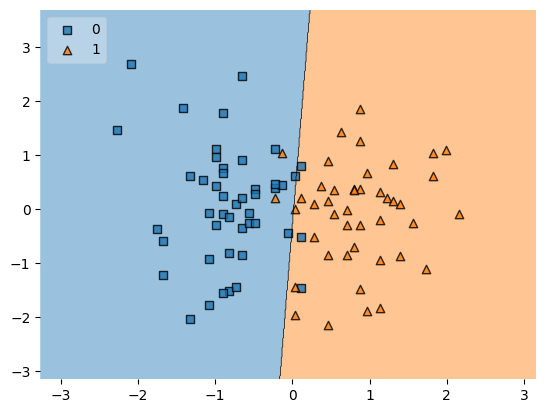

In [49]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)